# 📊 Exploratory Data Analysis - Veille NLP

This notebook performs basic Exploratory Data Analysis on the collected and processed articles.

**Purpose:** Understand data distribution, quality, and patterns

**Steps:**
1. Load articles (raw, processed, classified)
2. Basic statistics
3. Distribution analysis
4. Quality assessment
5. Identify improvements


In [32]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

In [33]:
# Load raw articles
raw_articles = []
try:
    with open('../data/articles_raw.jsonl', 'r', encoding='utf-8') as f:
        for line in f:
            raw_articles.append(json.loads(line))
    print(f"✓ Loaded {len(raw_articles)} raw articles")
except FileNotFoundError:
    print("❌ articles_raw.jsonl not found. Run: python main.py")

# Load processed articles
processed_articles = []
try:
    with open('../data/articles_processed.jsonl', 'r', encoding='utf-8') as f:
        for line in f:
            processed_articles.append(json.loads(line))
    print(f"✓ Loaded {len(processed_articles)} processed articles")
except FileNotFoundError:
    print("❌ articles_processed.jsonl not found")

# Load classified articles
classified_articles = []
try:
    with open('../data/articles_classified.jsonl', 'r', encoding='utf-8') as f:
        for line in f:
            classified_articles.append(json.loads(line))
    print(f"✓ Loaded {len(classified_articles)} classified articles")
except FileNotFoundError:
    print("❌ articles_classified.jsonl not found")

✓ Loaded 303 raw articles
✓ Loaded 303 processed articles
✓ Loaded 303 classified articles


## 2. Raw Data Statistics

In [34]:
if raw_articles:
    # Convert to DataFrame
    df_raw = pd.DataFrame(raw_articles)
    
    print("📊 RAW DATA STATISTICS")
    print(f"Total articles: {len(df_raw)}")
    print(f"\nColumns: {list(df_raw.columns)}")
    print(f"\nData types:\n{df_raw.dtypes}")
    print(f"\nMissing values:\n{df_raw.isnull().sum()}")
    
    # Sources
    source_counts = df_raw['source'].value_counts()
    print(f"\nArticles by source:\n{source_counts}")
    
    # Content length
    if 'content' in df_raw.columns:
        df_raw['content_length'] = df_raw['content'].str.len()
        print(f"\nContent length stats:\n{df_raw['content_length'].describe()}")

📊 RAW DATA STATISTICS
Total articles: 303

Columns: ['title', 'url', 'content', 'source', 'date', 'author', 'score']

Data types:
title      object
url        object
content    object
source     object
date       object
author     object
score      object
dtype: object

Missing values:
title        0
url          0
content      0
source       0
date       300
author     303
score      303
dtype: int64

Articles by source:
source
HackerNews    300
RSS             3
Name: count, dtype: int64

Content length stats:
count     303.000000
mean      700.504950
std       450.191871
min         4.000000
25%        79.000000
50%      1026.000000
75%      1054.000000
max      1082.000000
Name: content_length, dtype: float64


## 3. Preprocessing Quality

🔧 PREPROCESSING QUALITY
Total articles: 303

Tokens per article:
count    303.000000
mean      61.983498
std       39.423449
min        1.000000
25%        9.000000
50%       82.000000
75%       93.000000
max      190.000000
Name: num_tokens, dtype: float64

Token loss:
count    303.000000
mean      43.334488
std       12.120745
min        0.000000
25%       37.815000
50%       45.560000
75%       52.000000
max       66.670000
Name: token_loss_pct, dtype: float64


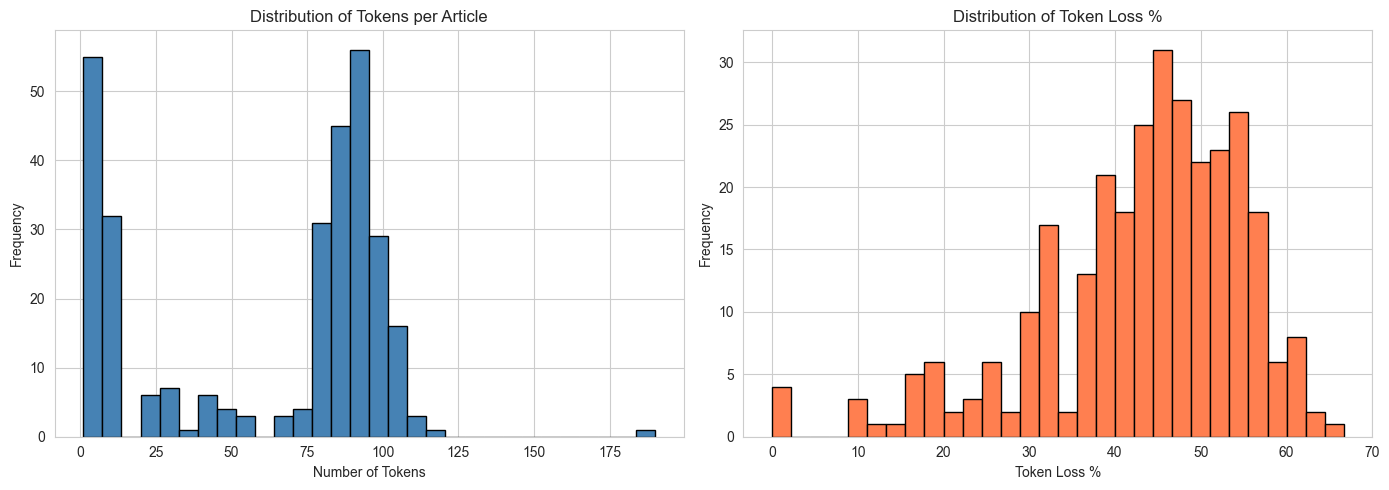

In [35]:
if processed_articles:
    df_processed = pd.DataFrame(processed_articles)
    
    print("🔧 PREPROCESSING QUALITY")
    print(f"Total articles: {len(df_processed)}")
    
    # Token statistics
    if 'num_tokens' in df_processed.columns:
        print(f"\nTokens per article:\n{df_processed['num_tokens'].describe()}")
        print(f"\nToken loss:\n{df_processed['token_loss_pct'].describe()}")
        
        # Visualize
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        axes[0].hist(df_processed['num_tokens'], bins=30, color='steelblue', edgecolor='black')
        axes[0].set_title('Distribution of Tokens per Article')
        axes[0].set_xlabel('Number of Tokens')
        axes[0].set_ylabel('Frequency')
        
        axes[1].hist(df_processed['token_loss_pct'], bins=30, color='coral', edgecolor='black')
        axes[1].set_title('Distribution of Token Loss %')
        axes[1].set_xlabel('Token Loss %')
        axes[1].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()

## 4. Classification Results

🤖 CLASSIFICATION RESULTS
Total articles: 303

Topic distribution:
topic_prediction
Advanced        230
Beginner         59
Intermediate     14
Name: count, dtype: int64

Topic confidence stats:
count    303.000000
mean       0.497350
std        0.105893
min        0.346800
25%        0.426600
50%        0.469200
75%        0.539200
max        0.950300
Name: topic_confidence, dtype: float64


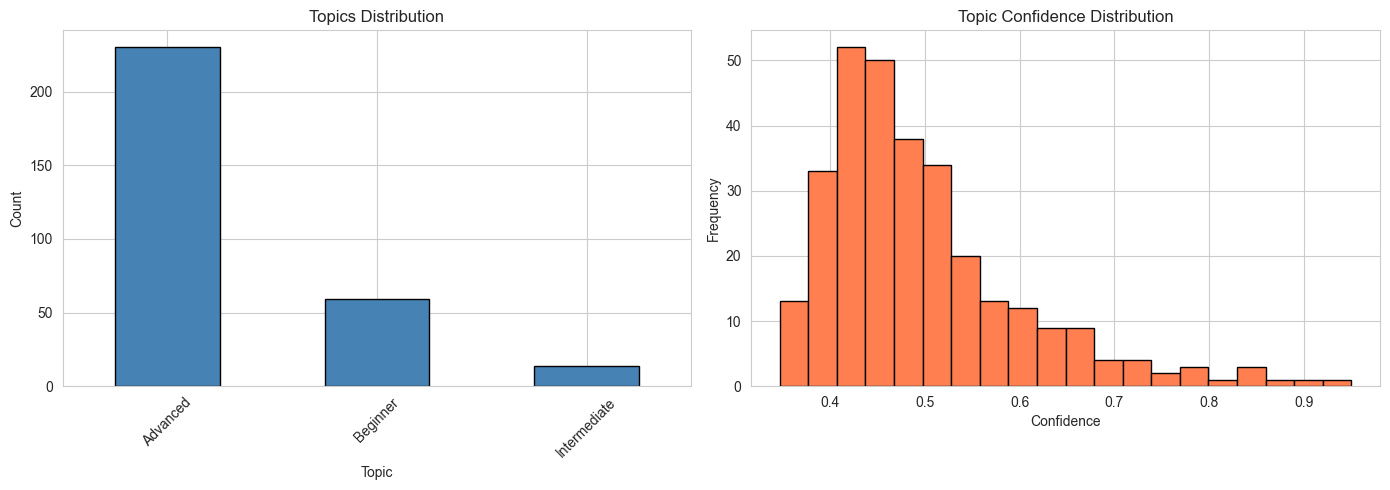


Sentiment distribution:
sentiment_label
Critique    206
Positif      66
Neutre       31
Name: count, dtype: int64


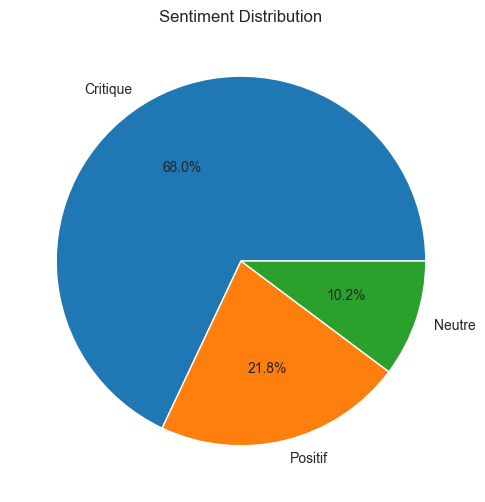


Duplicates: 5 (1.7%)


In [36]:
if classified_articles:
    df_classified = pd.DataFrame(classified_articles)
    
    print("🤖 CLASSIFICATION RESULTS")
    print(f"Total articles: {len(df_classified)}")
    
    # Topics
    if 'topic_prediction' in df_classified.columns:
        topic_counts = df_classified['topic_prediction'].value_counts()
        print(f"\nTopic distribution:\n{topic_counts}")
        print(f"\nTopic confidence stats:\n{df_classified['topic_confidence'].describe()}")
        
        # Visualize
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        topic_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
        axes[0].set_title('Topics Distribution')
        axes[0].set_xlabel('Topic')
        axes[0].set_ylabel('Count')
        axes[0].tick_params(axis='x', rotation=45)
        
        axes[1].hist(df_classified['topic_confidence'], bins=20, color='coral', edgecolor='black')
        axes[1].set_title('Topic Confidence Distribution')
        axes[1].set_xlabel('Confidence')
        axes[1].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()
    
    # Sentiments
    if 'sentiment_label' in df_classified.columns:
        sentiment_counts = df_classified['sentiment_label'].value_counts()
        print(f"\nSentiment distribution:\n{sentiment_counts}")
        
        # Visualize
        sentiment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6))
        plt.title('Sentiment Distribution')
        plt.ylabel('')
        plt.show()
    
    # Duplicates
    if 'is_duplicate' in df_classified.columns:
        num_duplicates = df_classified['is_duplicate'].sum()
        print(f"\nDuplicates: {num_duplicates} ({100*num_duplicates/len(df_classified):.1f}%)")

## 5. Sample Articles

In [37]:
if classified_articles:
    print("📄 SAMPLE ARTICLES")
    
    # Show 3 random articles with all details
    import random
    sample = random.sample(classified_articles, min(3, len(classified_articles)))
    
    for i, article in enumerate(sample, 1):
        print(f"\n{'='*70}")
        print(f"Article {i}:")
        print(f"{'='*70}")
        print(f"Title: {article.get('title', 'N/A')[:60]}...")
        print(f"Source: {article.get('source', 'N/A')}")
        print(f"Topic: {article.get('topic_prediction', 'N/A')} (confidence: {article.get('topic_confidence', 'N/A')})")
        print(f"Sentiment: {article.get('sentiment_label', 'N/A')}")
        print(f"Duplicate: {article.get('is_duplicate', False)}")
        print(f"Tokens: {article.get('num_tokens', 'N/A')}")

📄 SAMPLE ARTICLES

Article 1:
Title: Letter from a Birmingham Jail (1963)...
Source: HackerNews
Topic: Advanced (confidence: 0.4143)
Sentiment: Critique
Duplicate: False
Tokens: 82

Article 2:
Title: jQuery 4...
Source: HackerNews
Topic: Advanced (confidence: 0.4111)
Sentiment: Neutre
Duplicate: False
Tokens: 92

Article 3:
Title: x86 prefixes and escape opcodes flowchart...
Source: HackerNews
Topic: Advanced (confidence: 0.4148)
Sentiment: Critique
Duplicate: False
Tokens: 5


## 6. Recommendations for Improvement

Based on the EDA, here are potential improvements:

### Collecte
- [ ] Add more sources (GitHub, Medium, Twitter)
- [ ] Implement caching to avoid re-scraping
- [ ] Add retry logic for timeout handling

### Preprocessing
- [ ] Compare stemming vs lemmatization
- [ ] Test impact of removing accents
- [ ] Analyze token loss distribution

### Classification
- [ ] Fine-tune classifier on 50+ annotated examples
- [ ] Implement custom NER for specific technologies
- [ ] Calculate precision/recall/F1 metrics

### Report
- [ ] Add wordcloud visualization
- [ ] Create trend analysis (week-over-week)
- [ ] Export to markdown/JSON format
